In [1]:
import os
import sys

import findspark
findspark.init()

from pyspark import SparkContext

sc = SparkContext(master="local[4]")

Py4JJavaError: An error occurred while calling None.org.apache.spark.api.java.JavaSparkContext.
: org.apache.spark.SparkException: Invalid Spark URL: spark://HeartbeatReceiver@eiree-:1266
	at org.apache.spark.rpc.RpcEndpointAddress$.apply(RpcEndpointAddress.scala:66)
	at org.apache.spark.rpc.netty.NettyRpcEnv.asyncSetupEndpointRefByURI(NettyRpcEnv.scala:134)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:101)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:109)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:32)
	at org.apache.spark.executor.Executor.<init>(Executor.scala:184)
	at org.apache.spark.scheduler.local.LocalEndpoint.<init>(LocalSchedulerBackend.scala:59)
	at org.apache.spark.scheduler.local.LocalSchedulerBackend.start(LocalSchedulerBackend.scala:127)
	at org.apache.spark.scheduler.TaskSchedulerImpl.start(TaskSchedulerImpl.scala:183)
	at org.apache.spark.SparkContext.<init>(SparkContext.scala:501)
	at org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(Unknown Source)
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)
	at java.lang.reflect.Constructor.newInstance(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:238)
	at py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
	at py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Unknown Source)


In [2]:
import numpy as np

TOTAL = 1000000
dots = sc.parallelize([2.0 * np.random.random(2) - 1.0 for i in range(TOTAL)]).cache()
print("Number of random points:", dots.count())

stats = dots.stats()
print('Mean:', stats.mean())
print('stdev:', stats.stdev())

Number of random points: 1000000
Mean: [ 6.47374760e-04 -9.63050069e-05]
stdev: [0.5777019  0.57706825]


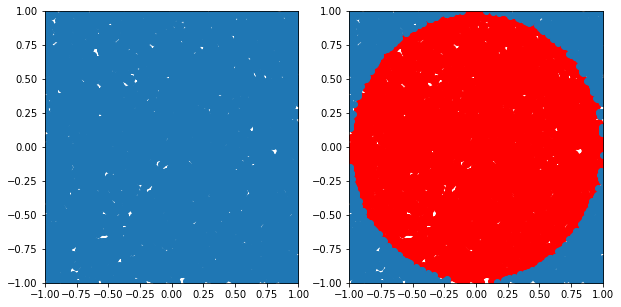

In [3]:
%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

sample = dots.sample(False, 0.01)
X = sample.map(itemgetter(0)).collect()
Y = sample.map(itemgetter(1)).collect()
plt.scatter(X, Y)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

inCircle = lambda v: np.linalg.norm(v) <= 1.0
dotsIn = sample.filter(inCircle).cache()
dotsOut = sample.filter(lambda v: not inCircle(v)).cache()

# inside circle
Xin = dotsIn.map(itemgetter(0)).collect()
Yin = dotsIn.map(itemgetter(1)).collect()
plt.scatter(Xin, Yin, color = 'r')

# outside circle
Xout = dotsOut.map(itemgetter(0)).collect()
Yout = dotsOut.map(itemgetter(1)).collect()
plt.scatter(Xout, Yout)

In [5]:
pi = 4.0 * (dots.filter(inCircle).count() / float(TOTAL))
print("The estimation of \pi is:", pi)

The estimation of \pi is: 3.139892
